# 1.Download the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset

In [4]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Perform Below Visualizations.


# 3.1 Univariate Analysis

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

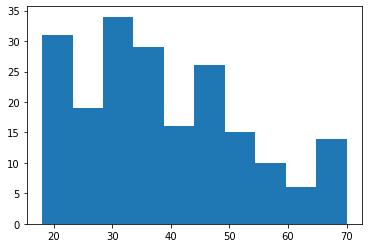

In [5]:
plt.hist(data['Age'])

# 3.2 Bivariate Analysis

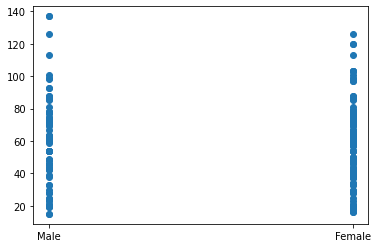

In [6]:
plt.scatter(data['Gender'],data['Annual Income (k$)'])

# 3.3 Multi-Variate Analysis

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>]],
      dtype=object)

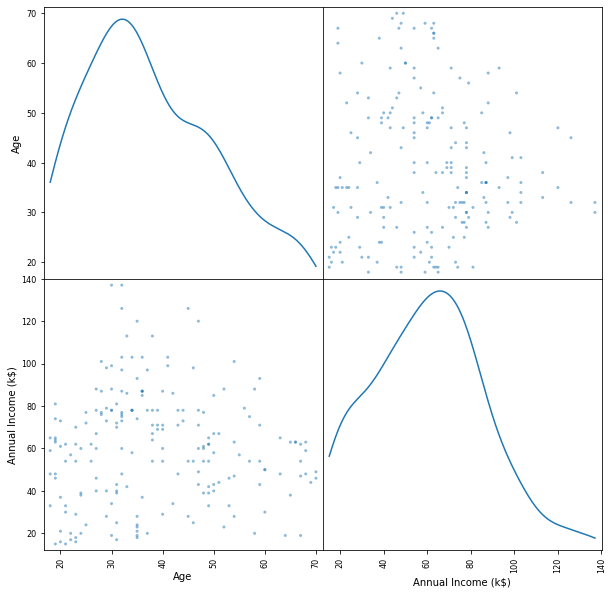

In [7]:
pd.plotting.scatter_matrix(data.loc[:,"Age":"Annual Income (k$)"] , diagonal ="kde", figsize=(10,10))

# 4. Perform descriptive statistics on the dataset.


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5. Check for Missing values and deal with them.


In [10]:
data.isnull().any()


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Find the outliers and replace them outliers

In [12]:
data["Spending Score (1-100)"]=np.where(data["Spending Score (1-100)"]>10,np.median,data["Spending Score (1-100)"])
data["Spending Score (1-100)"]

0      <function median at 0x0000024E90DE3820>
1      <function median at 0x0000024E90DE3820>
2                                            6
3      <function median at 0x0000024E90DE3820>
4      <function median at 0x0000024E90DE3820>
                        ...                   
195    <function median at 0x0000024E90DE3820>
196    <function median at 0x0000024E90DE3820>
197    <function median at 0x0000024E90DE3820>
198    <function median at 0x0000024E90DE3820>
199    <function median at 0x0000024E90DE3820>
Name: Spending Score (1-100), Length: 200, dtype: object

# 7. Check for Categorical columns and perform encoding.


In [13]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['CustomerID']=encoder.fit_transform(data['CustomerID'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,Male,19,15,<function median at 0x0000024E90DE3820>
1,1,Male,21,15,<function median at 0x0000024E90DE3820>
2,2,Female,20,16,6
3,3,Female,23,16,<function median at 0x0000024E90DE3820>
4,4,Female,31,17,<function median at 0x0000024E90DE3820>


# 8. Scaling the data

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[["CustomerID"]] = scaler.fit_transform(data[["CustomerID"]])
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  \
0      0.000000    Male   19                  15   
1      0.005025    Male   21                  15   
2      0.010050  Female   20                  16   
3      0.015075  Female   23                  16   
4      0.020101  Female   31                  17   
..          ...     ...  ...                 ...   
195    0.979899  Female   35                 120   
196    0.984925  Female   45                 126   
197    0.989950    Male   32                 126   
198    0.994975    Male   32                 137   
199    1.000000    Male   30                 137   

                      Spending Score (1-100)  
0    <function median at 0x0000024E90DE3820>  
1    <function median at 0x0000024E90DE3820>  
2                                          6  
3    <function median at 0x0000024E90DE3820>  
4    <function median at 0x0000024E90DE3820>  
..                                       ...  
195  <function median at 0x0000024E90DE3820>  

# 9. Perform any of the clustering algorithms

In [40]:
from sklearn.cluster import KMeans

In [42]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data[["CustomerID"]])
    TWSS.append(kmeans.inertia_)

In [43]:
TWSS

[4.208227064973108,
 1.870369435115275,
 1.052372414838009,
 0.6739728794727406,
 0.46833413297644005,
 0.345231181030782,
 0.26607913941567135]

Text(0, 0.5, 'TWSS')

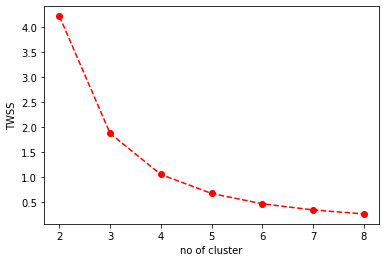

In [44]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [46]:
#selecting  4 clusters

model=KMeans(n_clusters=4)

model.fit(data[["CustomerID"]])

KMeans(n_clusters=4)

In [47]:
model.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [48]:
mb=pd.Series(model.labels_)
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,Male,19,15,<function median at 0x0000024E90DE3820>
1,0.005025,Male,21,15,<function median at 0x0000024E90DE3820>
2,0.010050,Female,20,16,6


# 10. Add the cluster data with the primary dataset

In [49]:
data['clust']=mb
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,0.000000,Male,19,15,<function median at 0x0000024E90DE3820>,3
1,0.005025,Male,21,15,<function median at 0x0000024E90DE3820>,3
2,0.010050,Female,20,16,6,3
3,0.015075,Female,23,16,<function median at 0x0000024E90DE3820>,3
4,0.020101,Female,31,17,<function median at 0x0000024E90DE3820>,3


In [50]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,0.979899,Female,35,120,<function median at 0x0000024E90DE3820>,2
196,0.984925,Female,45,126,<function median at 0x0000024E90DE3820>,2
197,0.989950,Male,32,126,<function median at 0x0000024E90DE3820>,2
198,0.994975,Male,32,137,<function median at 0x0000024E90DE3820>,2
199,1.000000,Male,30,137,<function median at 0x0000024E90DE3820>,2


# 11. Split the data into dependent and independent variables

In [51]:
#dependent
y= data['clust']
y

0      3
1      3
2      3
3      3
4      3
      ..
195    2
196    2
197    2
198    2
199    2
Name: clust, Length: 200, dtype: int32

In [52]:
#independent
x= data.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,<function median at 0x0000024E90DE3820>
1,Male,21,15,<function median at 0x0000024E90DE3820>
2,Female,20,16,6
3,Female,23,16,<function median at 0x0000024E90DE3820>
4,Female,31,17,<function median at 0x0000024E90DE3820>


In [53]:
x.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,<function median at 0x0000024E90DE3820>
196,Female,45,126,<function median at 0x0000024E90DE3820>
197,Male,32,126,<function median at 0x0000024E90DE3820>
198,Male,32,137,<function median at 0x0000024E90DE3820>
199,Male,30,137,<function median at 0x0000024E90DE3820>


# 12. Split the data into training and testing

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 13. Build the Model

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

# 14. Train the Model

In [58]:
x_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
134,Male,20,73,5
66,Female,43,48,<function median at 0x0000024E90DE3820>
26,Female,45,28,<function median at 0x0000024E90DE3820>
113,Male,19,64,<function median at 0x0000024E90DE3820>
168,Female,36,87,<function median at 0x0000024E90DE3820>
...,...,...,...,...
67,Female,68,48,<function median at 0x0000024E90DE3820>
192,Male,33,113,8
117,Female,49,65,<function median at 0x0000024E90DE3820>
47,Female,27,40,<function median at 0x0000024E90DE3820>


# 15. Test the Model

In [63]:
x_test

,Gender,Age,Annual Income (k$),Spending Score (1-100)
18,Male,52,23,<function median at 0x0000024E90DE3820>
170,Male,40,87,<function median at 0x0000024E90DE3820>
107,Male,54,63,<function median at 0x0000024E90DE3820>
98,Male,48,61,<function median at 0x0000024E90DE3820>
177,Male,27,88,<function median at 0x0000024E90DE3820>
182,Male,46,98,<function median at 0x0000024E90DE3820>
5,Female,22,17,<function median at 0x0000024E90DE3820>
146,Male,48,77,<function median at 0x0000024E90DE3820>
12,Female,58,20,<function median at 0x0000024E90DE3820>
152,Female,44,78,<function median at 0x0000024E90DE3820>


# 16. Measure the performance using Evaluvation Metrics

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
X_train=[5,-1,2,10]
y_test=[3.5,-0.9,2,9.9] 
print('RSquared=',r2_score(X_train,y_test)) 
print('MAE=',mean_absolute_error(X_train,y_test)) 
print('MSE=',mean_squared_error(X_train,y_test))

RSquared= 0.9656060606060606
MAE= 0.42499999999999993
MSE= 0.5674999999999999
